In [344]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [345]:
data <- data.table::fread(file = "tidy_data_wide.csv")
print(table(data$experiment))

wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
experiments <- c("20min STM", "20min STM unpaired")
data <- data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
panel1_data <- data[Genotype %in% wts,]


           1hr STM          20min STM 20min STM unpaired           24hr LTM 
                22                156                 73                183 
      24hr LTM CHX     24hr LTM GTACR            3hr STM               NONE 
                51                 25                 51                  1 


In [346]:
A <- panel1_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel1_data[experiment=="20min STM unpaired" & Genotype %in% wts,.(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, .(delta = POST-PRE)]
Bd <- B[, .(delta = POST-PRE)]

In [347]:
panel1_data[experiment=="20min STM", .N, by=.(User, Genotype)]

User,Genotype,N
<chr>,<chr>,<int>
CH,MB010B.(II)SPARC-Chrimson ISO,56
CH,MB010B.(II)SPARC-GFP ISO,41
ET,Iso31,22
ESB,Iso31,17
AOJ,Iso31,2


In [348]:
data.table::fwrite(x = A, file="prism/Fig1/Figure_1_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig1/Figure_1_20min STM unpaired.csv",  quote=TRUE)
x<- Cbind(Ad, Bd)
colnames(x) <- c("20min STM", "20min STM unpaired")
data.table::fwrite(x=x, file="prism/Fig1/Figure_1_boxplot.csv",  quote=TRUE)

In [349]:
panel1_data_long <- melt(panel1_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")
panel1_data_long$test <- factor(panel1_data_long$test, levels=c("PRE", "POST"))

[1] -1.02  1.00
[1] 0.8


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2

$direction
[1] "horizontal"

$annotation
              group__ y_position annotations stars   N test          PI
1:          20min STM        0.5     < 0.001   *** 138  PRE  0.02509035
2:          20min STM        0.5     < 0.001   *** 138 POST -0.22197688
3: 20min STM unpaired        0.5       0.999    NS  73  PRE  0.00619863
4: 20min STM unpaired        0.5       0.999    NS  73 POST  0.10553425
   PI_median     PI_std   std_error x
1:    0.0365 0.08318033 0.007080780 1
2:   -0.1875 0.30081807 0.025607335 2
3:    0.0000 0.08087352 0.009465529 1
4:    0.1000 0.25897318 0.030310518 2


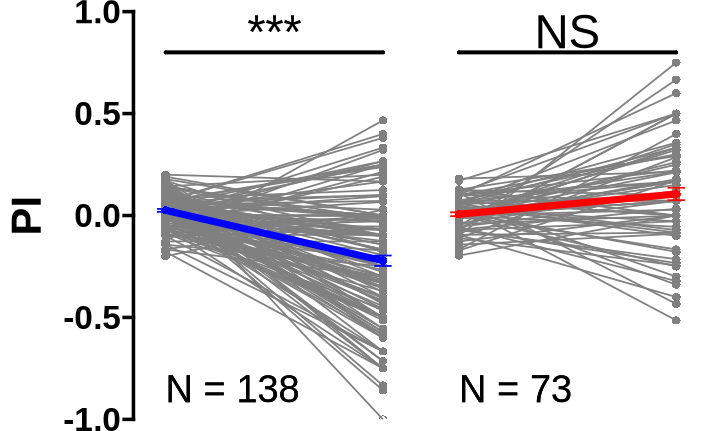

In [350]:
size_unit=3
ratio=1.2
panel1A <- learning_plot(
    panel1_data_long,
    "experiment",
    direction="horizontal",
    starsize=10, textsize=8,
    hjust_text=0,
    y_annotation=0.8,
    colors=colors_panel1[1:length(unique(panel1_data_long$experiment))],
    y_limits=y_limits_panel1
)
save_learning_plot(plot = panel1A, filename = "prism/Fig1/panel1A.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1A$n_facets)

panel1A

In [351]:
head(panel1_data_long$test)

[1] PRE PRE PRE PRE PRE PRE
Levels: PRE POST

Warning message in `[.data.table`(data, , `:=`(outlier, FALSE)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2


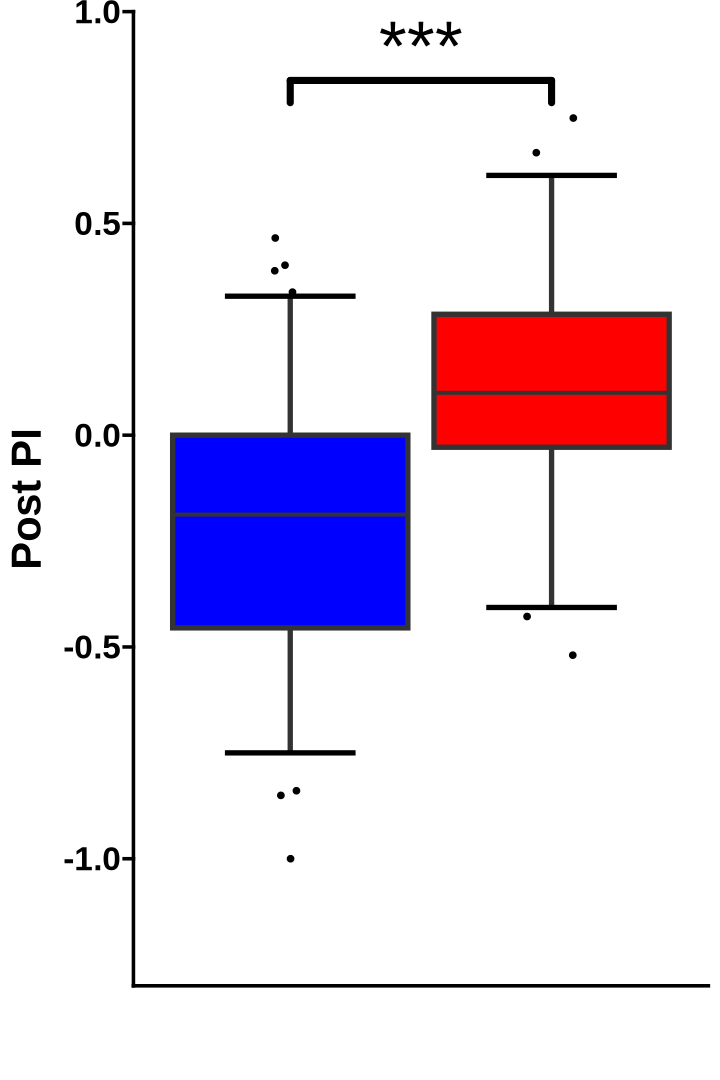

In [352]:
ratio=3
panel1B <- summary_plot(
    panel1_data_long,
    group = "experiment",
    colors=colors_panel1,
    comparisons=list(c("20min STM", "20min STM unpaired")),
    annotation_y=0.75,
    y_limits=c(-1.3, 1),
    text_y_size=20,
    title_y_size=25,
    preprocess_function=preprocess_summary_data_postPI
)
panel1B$gg <- panel1B$gg + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) 
save_summ_plot(plot = panel1B, filename = "prism/Fig1/panel1B.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1B$n_facets)
panel1B

In [355]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel1A$gg, panel1B$gg, ncol=2)
ggsave(plot = gg, filename = "prism/Fig1/Figure_1.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
